In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.special import gamma
import scipy.integrate as integrate

## Inputs

In [2]:
q  =  1.075
E  = np.linspace(0,10,1000)
bq = lambda q: np.sqrt(q-1)*(0.25)*(3*q-1)*(1+q)*gamma(0.5+(1/(q-1)))/gamma(1/(q-1))
Bq = bq(q)

## d(d,p)t : 2H + 2H ↔ p + 3H

In [3]:
m1 = 2
m2 = 2
M  = m1+m2
A  = (m1*m2)/(m1+m2)
Zi = 1
Zj = 1
T9 = np.linspace(0.1,10,1000)

In [4]:
Eas = np.linspace(0,1,1000)
T9as=1
qold=1.075
Mq2 = bq(qold)*pow((1-(qold-1)*Eas/(0.08617*T9as)),(1/(qold-1)))*np.exp(-0.9898*Zi*Zj*np.sqrt(A/Eas))
qnew = 1.3
Mq1 = bq(qnew)*pow((1-(qnew-1)*Eas/(0.08617*T9as)),(1/(qnew-1)))*np.exp(-0.9898*Zi*Zj*np.sqrt(A/Eas))
Mq3 = np.exp(-(Eas/(0.0861*T9as))-0.9898*Zi*Zj*np.sqrt(A/Eas))

C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_17528\3197033624.py:4: RuntimeWarning: divide by zero encountered in true_divide
  Mq2 = bq(qold)*pow((1-(qold-1)*Eas/(0.08617*T9as)),(1/(qold-1)))*np.exp(-0.9898*Zi*Zj*np.sqrt(A/Eas))
C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_17528\3197033624.py:6: RuntimeWarning: invalid value encountered in power
  Mq1 = bq(qnew)*pow((1-(qnew-1)*Eas/(0.08617*T9as)),(1/(qnew-1)))*np.exp(-0.9898*Zi*Zj*np.sqrt(A/Eas))
C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_17528\3197033624.py:6: RuntimeWarning: divide by zero encountered in true_divide
  Mq1 = bq(qnew)*pow((1-(qnew-1)*Eas/(0.08617*T9as)),(1/(qnew-1)))*np.exp(-0.9898*Zi*Zj*np.sqrt(A/Eas))
C:\Users\Manish Prasad\AppData\Local\Temp\ipykernel_17528\3197033624.py:7: RuntimeWarning: divide by zero encountered in true_divide
  Mq3 = np.exp(-(Eas/(0.0861*T9as))-0.9898*Zi*Zj*np.sqrt(A/Eas))


Text(0.5, 1.0, '$M_{q}(E,T)\\; of\\; the\\; reaction\\; ^{2}H(d,p)^{3}H\\; at\\; T_{9}=1$')

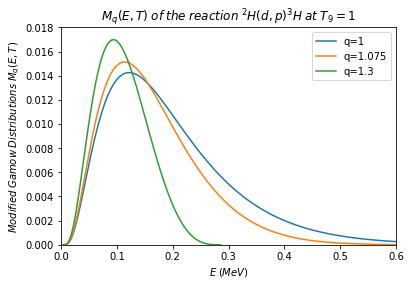

In [5]:
""" norm = np.linalg.norm(Mq1)
Mq1 = Mq1/norm
norm = np.linalg.norm(Mq2)
Mq2 = Mq2/norm """
plt.plot(Eas,Mq3, label='q=1')
plt.plot(Eas,Mq2, label='q=1.075')
plt.plot(Eas,Mq1, label='q=1.3')

plt.ylim((0,0.018))
plt.xlim((0,0.6))
plt.legend(loc='upper right')
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'$Modified\; Gamow\; Distributions\; M_{q}(E,T)$')
plt.title(r'$M_{q}(E,T)\; of\; the\; reaction\; ^{2}H(d,p)^{3}H\; at\; T_{9}=1$')

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{2}H(d,p)^{3}H$')

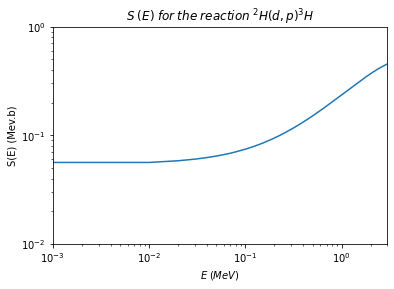

In [6]:
S_E = (0.0542 + 0.205*E - 0.024*E*E)
plt.plot(E,S_E)
plt.yscale('log')
plt.xscale('log')
plt.ylim((0.01,1))
plt.xlim((10**(-3),3))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{2}H(d,p)^{3}H$')

In [7]:
fddp = (T9**(-2/3) *np.exp(-1.06765*T9**(-1/3))*(-5.85032*(10**6) + 5.23171*(10**7)*T9**(1/3) 
- 1.70199*(10**8)* T9**(2/3) + 2.32242*(10**8)*T9 - 1.18812*(10**8)*T9**(4/3)+ 5.28874*(10**7)*T9**(5/3) - 9.85542*(10**6)*T9**2))
#plt.plot(T9,fddp)
#plt.xscale('log')

In [8]:
T9 = np.linspace(0.01,1)#,1000)
def S_E1(E):
    return 0.0542 + 0.205*E - 0.024*E*E
def integral1_mb(E,T9):
    return S_E1(E)*np.exp(-(E/(0.08617343*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [9]:
#E0 = lambda x: 0.122*((Zi*Zi*Zj*Zj*A)**(1/3))*x**(2/3)
#deltaE = lambda x: 0.2368*((Zi*Zi*Zj*Zj*A)**(1/6))*x**(5/6)
rate1_mb=[]
for T in T9:
    rate1_mb.append(integrate.quad(integral1_mb,0,np.inf,args=(T,)))#[0])

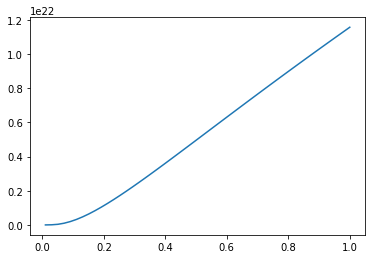

In [10]:
NA = 6.02214179e23# Avogadro number / mol^-1
rate1_mb=np.array(rate1_mb)
rate1_mb=rate1_mb[:,0]*np.sqrt(8/(np.pi*A))*(1/(0.08617343*T9)**1.5)*NA
plt.plot(T9,rate1_mb)

In [11]:
def integral1_q(E,T9,q):
    return S_E1(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))

In [12]:
rate1_q=[]
for T in T9:
    rate1_q.append(integrate.quad(integral1_q,0,0.0861*T/(q-1),args=(T,q))[0])
constant_outside = NA*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)


No handles with labels found to put in legend.


Text(0.5, 1.0, '$Reaction\\; rates\\; for\\;the\\; reaction\\; ^{2}H(d,p)^{3}H$')

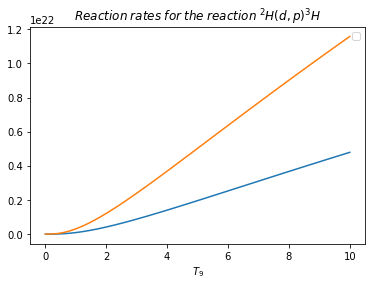

In [17]:
#rate1_q=np.array(rate1_q)
plt.plot(T9,rate1_q*constant_outside*bq(q))#*np.log(rate1_q)+np.log(bq(q))+np.log(constant_outside))#),label='q=1.075')#+np.log(constant_outside))#)
#plt.plot(T9,np.log(rate1_q2)+np.log(bq(q)))
#plt.plot(T9,fddp)
NA = 6.02214179e23# Avogadro number / mol^-1
""" T=np.linspace(0,1,1000)
kB = 8.617343e-11# Boltzmann constant / MeV/K
T9 = T/kB*1e-9 """
plt.plot(T9,rate1_mb)#np.log(rate1_mb))#+np.log(constant_outside))#*constant_outside))#+np.log(constant_outside),label='q=1')#*constant_outside))
#plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
#plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\; for\;the\; reaction\; ^{2}H(d,p)^{3}H$')

## d(d,n)3He : 2H + 2H ↔ n + 3He

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{2}H(d,n)^{3}He$')

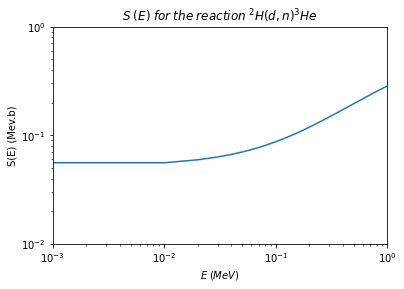

In [ ]:
def S_E2(E):
    return 0.0522 + 0.370*E - 0.196*E*E + 0.0672*E*E*E - 0.00885*E*E*E*E
plt.plot(E,S_E2(E)) 
plt.yscale('log')
plt.xscale('log')
plt.ylim((0.01,1))
plt.xlim((10**(-3),1))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{2}H(d,n)^{3}He$')

In [ ]:
def integral2_mb(E,T9):
    return S_E2(E)*np.exp(-(E/(0.0861*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [ ]:
rate2_mb=[]
for T in T9:
    rate2_mb.append(integrate.quad(integral2_mb,0,np.inf,args=(T,))[0])

In [ ]:
def integral2_q(E,T9,q):
    return S_E2(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))

In [ ]:
rate2_q=[]
for T in T9:
    rate2_q.append(integrate.quad(integral2_q,0,0.0861*T/(q-1),args=(T,q))[0])

Text(0.5, 1.0, '$Reaction\\; rates\\; for\\;the\\; reaction\\;^{2}H(d,n)^{3}He$')

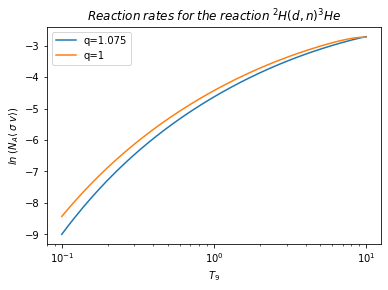

In [ ]:
plt.plot(T9,np.log(rate2_q)+np.log(constant_outside)+np.log(bq(q)),label='q=1.075')
plt.plot(T9,np.log(rate2_mb)+np.log(constant_outside),label='q=1')
#plt.plot(T9,fddp)
#plt.plot(T9,np.log(rate*constant_outside))
plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\; for\;the\; reaction\;^{2}H(d,n)^{3}He$')

## 7Be(n,p)7Li : 7Be + n ↔ p + 7Li

In [ ]:
m1 = 7
m2 = 1
M  = m1+m2
A  = (m1*m2)/(m1+m2)
Zi = 4
Zj = 0
E= np.logspace(-7,0.1,1000)

In [ ]:
def RE_Na_1(E):
    return (0.470*(10**10) - 0.202*(10**11)*(E**(1/2)) + 0.349*(10**11)*E - 0.253*(10**11)*(E**(3/2)) + 0.660*(10**10)*(E**2) + 0.109*(10**10)/(1 + ((E-0.317)/0.114)**2))*(E**(1/2))

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{7}Be(n,p)^{7}Li$')

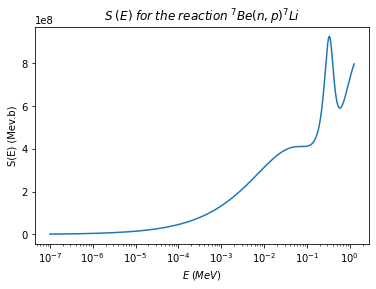

In [ ]:
plt.plot(E,RE_Na_1(E)) 
#plt.yscale('log')
plt.xscale('log')
#plt.ylim((0.01,1))
#plt.xlim((10**(-3),1))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{7}Be(n,p)^{7}Li$')

In [ ]:
def integral3_mb(E,T9):
    return RE_Na_1(E)*np.exp(-(E/(0.0861*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [ ]:
rate3_mb=[]
for T in T9:
    rate3_mb.append(integrate.quad(integral3_mb,0,np.inf,args=(T,))[0])

In [ ]:
def integral3_q(E,T9,q):
    return RE_Na_1(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))

In [ ]:
rate3_q=[]
for T in T9:
    rate3_q.append(integrate.quad(integral3_q,0,0.0861*T/(q-1),args=(T,q))[0])

Text(0.5, 1.0, '$Reaction\\; rates\\; for\\;the\\; reaction\\; ^{7}Be(n,p)^{7}Li$')

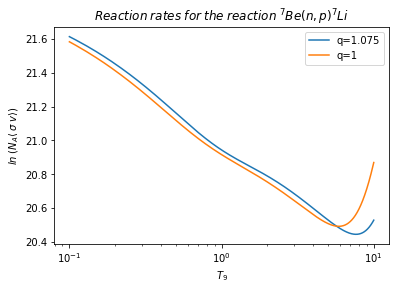

In [ ]:
constant_outside = ((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)
plt.plot(T9,np.log(rate3_q)+np.log(constant_outside)+np.log(bq(q)),label='q=1.075')
plt.plot(T9,np.log(rate3_mb)+np.log(constant_outside),label='q=1')
#plt.plot(T9,fddp)
#plt.plot(T9,np.log(rate*constant_outside))
plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\; for\;the\; reaction\; ^{7}Be(n,p)^{7}Li$')

## 4He(3He,γ)7Be : 4He + 3He ↔ γ + 7Be

In [ ]:
m1 = 4
m2 = 3
M  = m1+m2
A  = (m1*m2)/(m1+m2)
Zi = 2
Zj = 2
#E= np.logspace(-7,0.1,1000)
E  = np.linspace(0,2.5,1000)

In [ ]:
def S_E4(E):
    return (0.107*10**(-2) + np.exp(-0.552*E)*(-0.582*(10**(-3)) - 0.606*(10**(-3))*E - 0.154*(10**(-3))*E*E) )

Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{4}He(^{3}He,\\gamma)^{7}Be$')

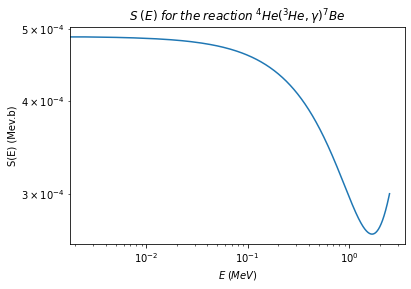

In [ ]:
plt.plot(E,S_E4(E)) 
plt.yscale('log')
plt.xscale('log')
#plt.ylim((0.01,1))
#plt.xlim((10**(-3),1))
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{4}He(^{3}He,\gamma)^{7}Be$')

In [ ]:
def integral4_mb(E,T9):
    return S_E4(E)*np.exp(-(E/(0.0861*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [ ]:
rate4_mb=[]
for T in T9:
    rate4_mb.append(integrate.quad(integral4_mb,0,np.inf,args=(T,))[0])

In [ ]:
def integral4_q(E,T9,q):
    return S_E4(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))

In [ ]:
rate4_q=[]
for T in T9:
    rate4_q.append(integrate.quad(integral4_q,0,0.0861*T/(q-1),args=(T,q))[0])

In [ ]:
constant_outside = 6.0221409*(10**23)*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)

Text(0.5, 1.0, '$Reaction\\; rates\\; for\\;the\\; reaction\\; ^{4}He(^{3}He,\\gamma)^{7}Be$')

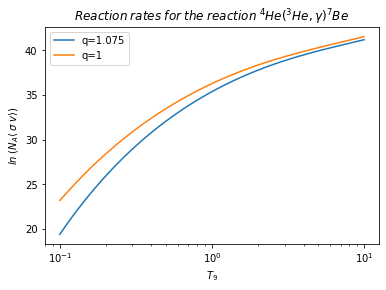

In [ ]:
plt.plot(T9,np.log(rate4_q)+np.log(constant_outside)+np.log(bq(q)),label='q=1.075')
plt.plot(T9,np.log(rate4_mb)+np.log(constant_outside),label='q=1')
#plt.plot(T9,fddp)
#plt.plot(T9,np.log(rate*constant_outside))
plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\; for\;the\; reaction\; ^{4}He(^{3}He,\gamma)^{7}Be$')

## Li7(p,α)α : 7Li + p ↔ 4He + 4He

In [ ]:
m1 = 7
m2 = 1
M  = m1+m2
A  = (m1*m2)/(m1+m2)
Zi = 3
Zj = 1
#E= np.logspace(-2,1,1000)
E  = np.linspace(0.1,0.8,1000)

In [ ]:
def S_E5(E):
    return (0.0609 + 0.173*E - 0.319*E*E + 0.217*E*E*E)
    #return (0.0587 + 0.191*E - 0.352*E*E + 0.234*E*E*E)


Text(0.5, 1.0, '$S\\;(E)\\; for\\;the\\; reaction\\; ^{7}Li(p,^{4}He)^{4}He$')

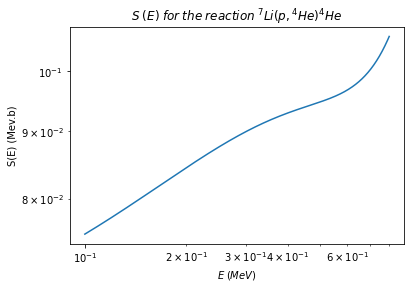

In [ ]:
plt.plot(E,S_E5(E))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$E\;(MeV)$')
plt.ylabel(r'S(E) (Mev.b)')
plt.title(r'$S\;(E)\; for\;the\; reaction\; ^{7}Li(p,^{4}He)^{4}He$')

In [ ]:
def integral5_mb(E,T9):
    return S_E5(E)*np.exp(-(E/(0.0861*T9) + 0.9898*Zi*Zj*np.sqrt(A/E)))

In [ ]:
rate5_mb=[]
for T in T9:
    rate5_mb.append(integrate.quad(integral5_mb,0,np.inf,args=(T,))[0])

In [ ]:
def integral5_q(E,T9,q):
    return S_E5(E)*np.exp(-0.9898*Zi*Zj*np.sqrt(A/E))*((1-(q-1)*E/(0.0861*T9))**(1/(q-1)))

In [ ]:
rate5_q=[]
for T in T9:
    rate5_q.append(integrate.quad(integral5_q,0,0.0861*T/(q-1),args=(T,q))[0])

In [ ]:
constant_outside = 6.0221409*(10**23)*((2/(np.pi*A))**0.5)*((1/(0.0861*T9))**1.5)

Text(0.5, 1.0, '$Reaction\\; rates\\;  for\\;the\\; reaction\\; ^{7}Li(p,^{4}He)^{4}He$')

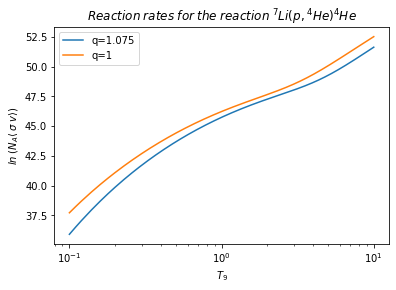

In [ ]:
plt.plot(T9,np.log(rate5_q)+np.log(constant_outside)+np.log(bq(q)),label='q=1.075')
plt.plot(T9,np.log(rate5_mb)+np.log(constant_outside),label='q=1')
#plt.plot(T9,fddp)
#plt.plot(T9,np.log(rate*constant_outside))
plt.xscale('log')
plt.legend()
plt.xlabel(r'$T_{9}$')
plt.ylabel(r'$ln\;(N_{A} \langle \;\sigma\;v \rangle)$')
plt.title(r'$Reaction\; rates\;  for\;the\; reaction\; ^{7}Li(p,^{4}He)^{4}He$')